# Lekcja 3. Pakiet `numpy`

Nazwa biblioteki `NumPy` jest skrótem od **Num**erical **Py**thon. Jak sama nazwa wskazuje - jest to narzędzie służące do obliczeń numerycznych w pythonie. Zawiera ono nie tylko wiele funkcji służących do inżynierskich obliczeń numerycznych, ale przede wszystkim nowe typy typy danych - w szczególności tablice i macierze - oraz operacje na nich.

W literaturze często `numpy` jest wymieniane wspólnie (i czasem zamiennie) z innym pakietem pythona: `SciPy` (**Sci**entific **Py**thon). Jak same nazwy sugerują, scipy jest pakietem obliczeń naukowych, które oczywiście często zawierają w sobie obliczenia numeryczne. Dlatego funkcje pakietu `numpy` są również zawarte w pakiecie `scipy`. Podstawowa różnica jest taka, że pakiet `numpy` jest napisany w języku C, natomiast `scipy` - w pythonie. Dla początkującego użytkownika różnice między pakietami nie są drastyczne, wystarczy zapamiętać, że `numpy` zapewnia większą szybkość działania, z drugiej strony `scipy` jest bardziej elastyczny i rozbudowany. W bieżących lekcjach będziemy się posługiwać pakietem `numpy`, jednak zainteresowany czytelnik może bezpośrednio, lub czasem z niewielkimi zmianami, korzystać z przykładów (np. znalezionych w internecie) dla pakietu `scipy`.

## Prosty przykład użycia pakietu

Zanim zaczniemy używać pakietu, musimy go oczywiście zaimportować poleceniem `import numpy`. Zwykle używa się jednak bardziej rozbudowanej wersji tego polecenia:


In [ ]:
import numpy as np

Zdefiniujmy przykładową listę temperatur wyrażonych w stopniach Celsjusza:

In [ ]:
TvaluesC = [36.6, 36.7, 38.4, 37.5, 36.9, 38.2, 36.8, 37.0]
print(type(TvaluesC))
print(TvaluesC)

<class 'list'>
[36.6, 36.7, 38.4, 37.5, 36.9, 38.2, 36.8, 37.0]


Załóżmy, że chcemy wyświetlić wartości temperatur, ale wyrażone w stopniach Fahrenheita. W ,,czystym'' pythonie powinniśmy stworzyć nową listę i wypełnić ją przeliczonymi wartościami, a następnie ją wyświetlić:

In [ ]:
TvaluesF = [9/5*t+32 for t in TvaluesC]
print(TvaluesF)

[97.88000000000001, 98.06, 101.12, 99.5, 98.42, 100.76, 98.24, 98.60000000000001]


Jak widzimy, oprócz niezbyt eleganckich obliczeń natrafiliśmy jeszcze na problemy związane z propagacją niedokładności, omawiane w lekcji pierwszej.

Spróbujmy zrobić to samo korzystając z możliwości pakietu `numpy`. Najpierw zamieńmy listę temperatur na jednowymiarową tablicę (`array`) wartości:

In [ ]:
C=np.array(TvaluesC)
print(type(C))
print(C)

<class 'numpy.ndarray'>
[36.6 36.7 38.4 37.5 36.9 38.2 36.8 37. ]


Następnie wyświetlmy wartości wyrażone w stopniach Fahrenheita:

In [ ]:
print(9/5 * C + 32)

[ 97.88  98.06 101.12  99.5   98.42 100.76  98.24  98.6 ]


Zauważmy, że nie musieliśmy przechowywać przeliczonych wartości, samo przeliczenie wygląda dużo lepiej a wyświetlone wyniki są dokładniejsze.

Przedstawmy temperatury na wykresie:

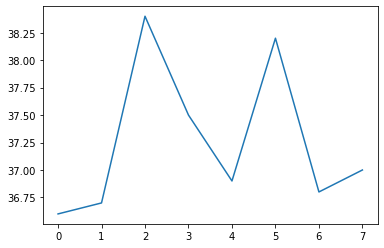

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(C)
plt.show()


Jak widać, wartości z tablicy zostały automatycznie przypisane do współrzędnej $y$, natomiast indeksy tych wartości - do współrzędnej $x$.

## Operacje na tablicach (`arrays`)

Przyjrzyjmy się bliżej możliwościom tablic w `numpy`. Zacznijmy od wypełniania ich danymi.

### Tablice wypełnione równomiernymi danymi

#### Funkcja `arange()`

Jednym z narzędzi tworzenia równomiernie wypełnionych tablic jest polecenie `arange([start,] stop[, step], [, dtype=None])`. Argumentami są `początek` (domyślnie $0$), `koniec` (nie wchodzący do wyniku), opcjonalne `krok` i `typ\_danych` Jak widać po składni, jest ona zbliżona do pythonowej funkcji `range()`, jednak polecenie `arange()` tworzy tablicę, podczas gdy `range()` tworzy iterator listy. Sprawdźmy to na przykładzie:


In [ ]:
import numpy as np

a = np.arange(1, 10)
print(a)
print(type(a),'\n')

x = range(1, 10)
print(x)
print(type(x))

[1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'> 

range(1, 10)
<class 'range'>


Drugą ważną różnicą pomiędzy `arange()` i `range()` jest możliwość używania **ułamkowych** wartości:

In [ ]:
np.arange(12.04, 12.84, 0.08)

array([12.04, 12.12, 12.2 , 12.28, 12.36, 12.44, 12.52, 12.6 , 12.68,
       12.76, 12.84])

Zwróćmy uwagę na pewną osobliwość. Standardowo `arange()` wypełnia tablicę danymi w zakresie $[start, stop)$ (przedział prawostronnie otwarty, to znaczy wartość $stop$ nie znajduje się w wyniku). W powyższym przykładzie tak nie jest! Wynika to (nie wdając się w nadmierne szczegóły) z mechanizmu zaokrąglania liczb zmiennoprzecinkowych. 

### Funkcja `linspace()`

Drugim poleceniem jest znana nam już funkcja `linspace()`. Jej składnia to `linspace(start, stop, num=50, endpoint=True, retstep=False)`. Tworzy ona tablicę składającą się z `num` (domyślnie $50$) równomiernie rozmieszczonych wartości z zakresu `start` do `stop`. To, czy wartość `stop` również wejdzie do tablicy zależy od argumentu `endpoint`. Domyślnie wynosi ona `True`, więc koniec zakresu znajdzie się w wynikowej tablicy. Sprawdźmy, jak to działa:

In [ ]:
import numpy as np

# 50 wartosci z zakresu od 1 do 10:
print(np.linspace(1, 10))

# 7 wartości pomiędzy 1 and 10:
print(np.linspace(1, 10, 7))

# to samo, ale bez liczby 10:
print(np.linspace(1, 10, 7, endpoint=False))


[ 1.          1.18367347  1.36734694  1.55102041  1.73469388  1.91836735
  2.10204082  2.28571429  2.46938776  2.65306122  2.83673469  3.02040816
  3.20408163  3.3877551   3.57142857  3.75510204  3.93877551  4.12244898
  4.30612245  4.48979592  4.67346939  4.85714286  5.04081633  5.2244898
  5.40816327  5.59183673  5.7755102   5.95918367  6.14285714  6.32653061
  6.51020408  6.69387755  6.87755102  7.06122449  7.24489796  7.42857143
  7.6122449   7.79591837  7.97959184  8.16326531  8.34693878  8.53061224
  8.71428571  8.89795918  9.08163265  9.26530612  9.44897959  9.63265306
  9.81632653 10.        ]
[ 1.   2.5  4.   5.5  7.   8.5 10. ]
[1.         2.28571429 3.57142857 4.85714286 6.14285714 7.42857143
 8.71428571]


Zauważmy, że po wyłączeniu ostatniego elementu (`endpoint=False`) zmienił się również odstęp pomiędzy wartościami!

Ostatnim argumentem, dotychczas nieomawianym, jest `retstep` (o domyślnej wartości `False`). Zmiana wartości na `True` powoduje, że funkcja oprócz tablicy zwróci również wartość kroku (odstępu pomiędzy sąsiednimi wartościami). Prześledźmy to na przykładzie:

In [ ]:
import numpy as np

dane, dystans = np.linspace(1, 50, retstep=True)
print(dane[0], dane[-1])
print(dystans,'\n')

dane, dystans = np.linspace(0, 75, 25, endpoint=True, retstep=True)
print(dane[0], dane[-1])
print(dystans,'\n')

dane, dystans = np.linspace(0, 75, 25, endpoint=False, retstep=True)
print(dane[0], dane[-1])
print(dystans)


1.0 50.0
1.0 

0.0 75.0
3.125 

0.0 72.0
3.0


### Wymiary tablic

Tablice w `numpy` mogą być $0$-, $1$- $2$- i wielowymiarowe. Skalar jest tablicą $0$-wymiarową. Do sprawdzenia wymiarowości tablicy służy funkcja `.ndim()`. Przy okazji - w przeciwieństwie do pythonowych list, tablice mogą zawierać wyłącznie elementy homogeniczne, to znaczy elementy jednakowego typu. Typ ten jest przechowywany w atrybucie `.dtype`. Prześledźmy to na przykładach.

In [ ]:
import numpy as np

# Tablica zerowymiarowa - skalar

S = np.array(100)
print(S)
print(type(S))
print(np.ndim(S))
print(S.dtype)
print()

# Tablica jednowymiarowa (wektor) z wartościami całkowitymi 

D = np.array([1,2,3,4,5,6,7,8,9])
print(D)
print(type(D))
print(np.ndim(D))
print(D.dtype)
print()

# Tablica dwuwymiarowa z wartościami zmiennoprzecinkowymi

F = np.array([[0.1, 0.2],[0.2, 0.3],[0.3, 0.4]])
print(F)
print(type(F))
print(np.ndim(F))
print(F.dtype)

100
<class 'numpy.ndarray'>
0
int64

[1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>
1
int64

[[0.1 0.2]
 [0.2 0.3]
 [0.3 0.4]]
<class 'numpy.ndarray'>
2
float64


Kształt (rozmiary) tablicy możemy sprawdzić za pomocą funkcji `shape()` lub  atrybutu o tej samej nazwie:

In [ ]:
import numpy as np

#tablica dwuwymiarowa

D = np.array([[1,2,3],[4,5,6]])
print(D)
print(np.shape(D))
print(D.shape)
print()

#tablica trójwymiarowa

T = np.array([[[1,2,3,4],[5,6,7,8],[9,10,11,12]],[[21,22,23,24],[25,26,27,28],[29,30,31,32]]])
print(T)
print(np.shape(T))
print(T.shape)
print()

#skalar

S = np.array(100)
print(S)
print(np.shape(S))
print(S.shape)


[[1 2 3]
 [4 5 6]]
(2, 3)
(2, 3)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[21 22 23 24]
  [25 26 27 28]
  [29 30 31 32]]]
(2, 3, 4)
(2, 3, 4)

100
()
()


Jak widzimy, `shape` zwraca krotkę mającą tyle elementów, ile wymiarów (osi) ma tablica. Odpowiednie wartości krotki wyrażają wymiar (długość) tablicy w danym kierunku (osi). Dla tablicy będącej skalarem krotka jest pusta.

### Tablice zer i jedynek

Często istnieje konieczność utworzenia tablic składających się z samych jedynek lub zer. `numpy` udostępnia w tym celu odpowiednie funkcje, o nazwach (jak nietrudno zgadnąć) `ones()` i `zeros()`. Obowiązkowym argumentem jest liczba całkowita lub krotka liczb całkowitych, definiująca wymiar i rozmiary tablicy. Otrzymana tablica zawiera wartości (odpowiednio jedynki lub zera) typu `float64`. Jeśli chcemy utworzyć tablicę wartości całkowitych, możemy to zadać parametrem `dtype=int`. Prześledźmy to na przykładach:



In [ ]:
import numpy as np

# Wektor jedynek

A = np.ones(5)
print(A)
print(A.dtype)
print()

# Tablica 3x5 zer typu int

B = np.zeros((3,5), dtype=int)
print(B)
print(B.dtype)
print()

[1. 1. 1. 1. 1.]
float64

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]
int64



Można też tworzyć tablice zer i jedynek na podstawie istniejących tablic. Wynikowa tablica będzie miała takie same wymiar, rozmiary i typ danych jak oryginał: 

In [ ]:
import numpy as np

A = np.array([1,2,3,4])
B = np.array([[1.2,2.5],[0.11,-1.75]])

C=np.zeros_like(A)
D=np.ones_like(B)

print(A, A.dtype)
print(C, C.dtype)
print()
print(B, B.dtype)
print(D, D.dtype)

[1 2 3 4] int64
[0 0 0 0] int64

[[ 1.2   2.5 ]
 [ 0.11 -1.75]] float64
[[1. 1.]
 [1. 1.]] float64


W algebrze liniowej często używana jest macierz jednostkowa (identycznościowa) $I$. Jest to kwadratowa macierz mająca jedynki na głównej przekątnej oraz zera wszędzie indziej. w numpy do jej tworzenia służy polecenie `identity()` 

In [ ]:
import numpy as np

I = np.identity(7, int)

print(I)

[[1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0]
 [0 0 0 0 0 0 1]]


### Indeksowanie i wycinanie tablic

Do poszczególnych elementów tablic (niezależnie od ich wymiaru) możemy się odwoływać w standardowy sposób, identyczny z innymi typami sekwencyjnymi w pythonie (pamiętajmy, że indeksujemy od $0$ a koniec zakresu nie jest wliczany):

In [ ]:
import numpy as np

# Kwadratowa tablica 10x10

A=np.array([[i+j for i in np.linspace(0.1,1,10)] for j in np.linspace(10,19,10)])
print(A)
print()
# Pierwszy element pierwszego wiersza:

print('A[0,0] =', A[0][0])

# Trzeci wiersz, czwarta kolumna:

print('A[2,3] =', A[2][3])

# przedostatni wiersz, ostatnia kolumna:

print('A[-2,-1] =', A[-2][-1])





[[10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11. ]
 [11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9 12. ]
 [12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13. ]
 [13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14. ]
 [14.1 14.2 14.3 14.4 14.5 14.6 14.7 14.8 14.9 15. ]
 [15.1 15.2 15.3 15.4 15.5 15.6 15.7 15.8 15.9 16. ]
 [16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9 17. ]
 [17.1 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18. ]
 [18.1 18.2 18.3 18.4 18.5 18.6 18.7 18.8 18.9 19. ]
 [19.1 19.2 19.3 19.4 19.5 19.6 19.7 19.8 19.9 20. ]]

A[0,0] = 10.1
A[2,3] = 12.4
A[-2,-1] = 19.0


Środowisko `numpy` pozwala jednak na bardziej naturalne indeksowanie, zgodne z intuicją matematyczną, gdzie oba indeksy (dla tablic dwuwymiarowych) umieszczamy w pojedynczym nawiasie kwadratowym i oddzielamy przecinkiem:

In [ ]:
# Pierwszy element pierwszego wiersza:

print('A[0,0] =', A[0, 0])

# Trzeci wiersz, czwarta kolumna:

print('A[2,3] =', A[2, 3])

# przedostatni wiersz, ostatnia kolumna:

print('A[-2,-1] =', A[-2, -1])



A[0,0] = 10.1
A[2,3] = 12.4
A[-2,-1] = 19.0


Ten sposób indeksowania pokazuje swoją prawdziwą przydatność podczas wycinać fragmentów (zakresów) tablic:




In [ ]:
# lewy górny róg o rozmiarze 2x3:
print(A[:2,:3])
print()

# cztery elementy w centrum tablicy:

print(A[4:6,4:6])
print()

# parzyste wiersze, nieparzyste kolumny

print(A[1::2, ::2])
print()

# ostatnia kolumna

print(A[:, -1:])

[[10.1 10.2 10.3]
 [11.1 11.2 11.3]]

[[14.5 14.6]
 [15.5 15.6]]

[[11.1 11.3 11.5 11.7 11.9]
 [13.1 13.3 13.5 13.7 13.9]
 [15.1 15.3 15.5 15.7 15.9]
 [17.1 17.3 17.5 17.7 17.9]
 [19.1 19.3 19.5 19.7 19.9]]

[[11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]
 [20.]]


To tylko niewielki wycinek możliwości tworzenia i dostępu do tablic. Ponownie zachęcamy do samodzielnego eksperymentowania.